In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/skin disease detection fusion model/metadata.csv")

In [ ]:
df.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


In [ ]:
df['background_mother'].unique()

array([nan, 'POMERANIA', 'ITALY', 'GERMANY', 'BRAZIL', 'UNK', 'POLAND',
       'NORWAY', 'PORTUGAL', 'NETHERLANDS', 'FRANCE', 'SPAIN'],
      dtype=object)

In [ ]:
df['background_father'].unique()

array([nan, 'POMERANIA', 'GERMANY', 'BRAZIL', 'NETHERLANDS', 'ITALY',
       'POLAND', 'UNK', 'PORTUGAL', 'BRASIL', 'CZECH', 'AUSTRIA', 'SPAIN',
       'ISRAEL'], dtype=object)

In [ ]:
df.describe()

,lesion_id,age,fitspatrick,diameter_1,diameter_2
count,2298.000000,2298.000000,1494.000000,1494.000000,1494.000000
mean,1529.933856,60.464752,2.265730,11.897055,8.852209
std,1196.285644,15.894866,0.729029,8.634492,5.797036
min,6.000000,6.000000,1.000000,0.000000,0.000000
25%,720.500000,52.000000,2.000000,7.000000,5.000000
50%,1297.000000,62.000000,2.000000,10.000000,8.000000
75%,1782.750000,72.000000,3.000000,15.000000,10.000000
max,4820.000000,94.000000,6.000000,100.000000,70.000000


In [ ]:
df.isnull().sum()

,0
patient_id,0
lesion_id,0
smoke,804
drink,804
background_father,818
background_mother,822
age,0
pesticide,804
gender,804
skin_cancer_history,804


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           2298 non-null   object 
 1   lesion_id            2298 non-null   int64  
 2   smoke                1494 non-null   object 
 3   drink                1494 non-null   object 
 4   background_father    1480 non-null   object 
 5   background_mother    1476 non-null   object 
 6   age                  2298 non-null   int64  
 7   pesticide            1494 non-null   object 
 8   gender               1494 non-null   object 
 9   skin_cancer_history  1494 non-null   object 
 10  cancer_history       1494 non-null   object 
 11  has_piped_water      1494 non-null   object 
 12  has_sewage_system    1494 non-null   object 
 13  fitspatrick          1494 non-null   float64
 14  region               2298 non-null   object 
 15  diameter_1           1494 non-null   f

In [ ]:
missing_val = df.isnull().sum()
missing_per = (missing_val/len(df))*100

print(missing_per)

patient_id              0.000000
lesion_id               0.000000
smoke                  34.986945
drink                  34.986945
background_father      35.596171
background_mother      35.770235
age                     0.000000
pesticide              34.986945
gender                 34.986945
skin_cancer_history    34.986945
cancer_history         34.986945
has_piped_water        34.986945
has_sewage_system      34.986945
fitspatrick            34.986945
region                  0.000000
diameter_1             34.986945
diameter_2             34.986945
diagnostic              0.000000
itch                    0.000000
grew                    0.000000
hurt                    0.000000
changed                 0.000000
bleed                   0.000000
elevation               0.000000
img_id                  0.000000
biopsed                 0.000000
dtype: float64


35% missing value percentage is moderate — too high to ignore, but not high enough to drop entire columns.

Therefore, for categorical/boolean columns will be filled with 'False'.
numerical columns will be filled with 'median' values.
and rest of the columns with 'Unknown'.

In [ ]:
# categorical and boolean columns to be filled with unknown/false values

cat_fill_unknown = ['background_father', 'background_mother','gender']

bool_fill_false = ['smoke','drink','pesticide','skin_cancer_history',
                   'cancer_history', 'has_piped_water', 'has_sewage_system']

# columns to be filled with median values

num_fill_med = ['fitspatrick','diameter_1','diameter_2']

#filling cat columns with unknown

df[cat_fill_unknown] = df[cat_fill_unknown].fillna('Unknown')

#filling boolean columns with false

df[bool_fill_false] = df[bool_fill_false].fillna('False')

#filling numerical cols with median values
for col in num_fill_med:
    df[col].fillna(df[col].median(), inplace = True)

<ipython-input-164-7ed3132bab7e>:22: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           2298 non-null   object 
 1   lesion_id            2298 non-null   int64  
 2   smoke                2298 non-null   object 
 3   drink                2298 non-null   object 
 4   background_father    2298 non-null   object 
 5   background_mother    2298 non-null   object 
 6   age                  2298 non-null   int64  
 7   pesticide            2298 non-null   object 
 8   gender               2298 non-null   object 
 9   skin_cancer_history  2298 non-null   object 
 10  cancer_history       2298 non-null   object 
 11  has_piped_water      2298 non-null   object 
 12  has_sewage_system    2298 non-null   object 
 13  fitspatrick          2298 non-null   float64
 14  region               2298 non-null   object 
 15  diameter_1           2298 non-null   f

In [ ]:
import plotly.express as px

# Create a box plot
fig = px.box(df, y="age", points="all")  # Use "column_name" as your numerical column
fig.show()


In [ ]:
import plotly.express as px

# Define your numerical columns
num_col = ['age', 'fitspatrick', 'diameter_1', 'diameter_2']

# Iterate over each column and create a box plot
for col in num_col:
    fig = px.box(df, y=col, points="all", title=f'Box Plot for {col}', labels={col: f'Values of {col}'})

    # Update the layout to adjust the figure size
    fig.update_layout(
        width=800,  # Increase width
        height=500,  # Increase height
    )

    fig.show()


In [ ]:
df.to_csv('processed1.csv')

In [ ]:
df['region'].unique()

array(['ARM', 'NECK', 'FACE', 'HAND', 'FOREARM', 'CHEST', 'NOSE', 'THIGH',
       'SCALP', 'EAR', 'BACK', 'FOOT', 'ABDOMEN', 'LIP'], dtype=object)

converting boolean strings


In [ ]:
bool_cols = ['smoke', 'drink', 'pesticide', 'skin_cancer_history', 'cancer_history',
             'has_piped_water', 'has_sewage_system', 'itch', 'grew', 'hurt', 'changed',
             'bleed', 'elevation', 'biopsed']

# Fix missing values (if needed)
df[bool_cols] = df[bool_cols].fillna('False')

# Convert string booleans to 0/1 safely
df[bool_cols] = df[bool_cols].apply(lambda col: col.astype(str).str.lower().eq('true').astype(int))


<ipython-input-171-86d4d343a267>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-171-86d4d343a267>:9: UserWarning:


The palette list has fewer values (10) than needed (14) and will cycle, which may produce an uninterpretable plot.



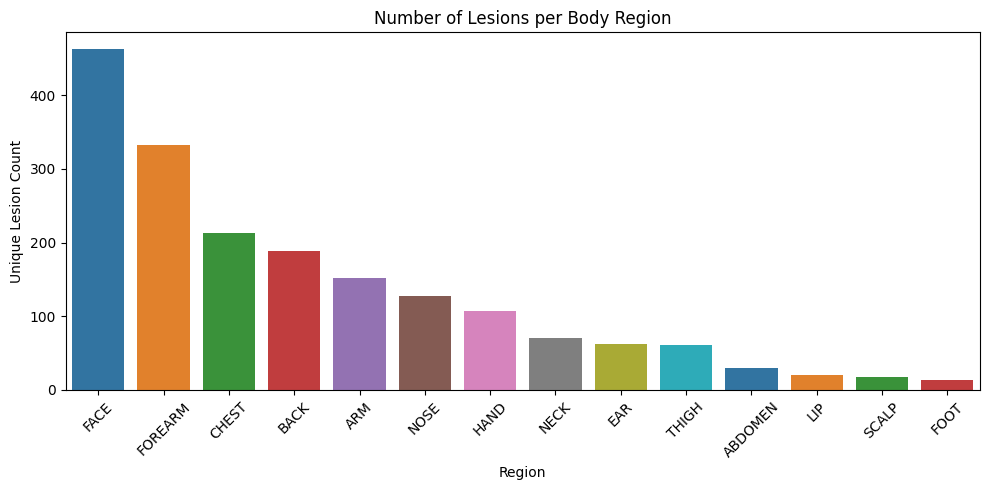

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure each lesion_id-region pair is unique
df_unique_lesions = df[['lesion_id', 'region']].drop_duplicates()

palette = sns.color_palette("tab10")
plt.figure(figsize=(10, 5))
sns.countplot(data=df_unique_lesions, x='region', order=df['region'].value_counts().index, palette=palette)
plt.title("Number of Lesions per Body Region")
plt.xlabel("Region")
plt.ylabel("Unique Lesion Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-172-b68343f9bdc6>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-172-b68343f9bdc6>:9: UserWarning:

The palette list has more values (20) than needed (14), which may not be intended.



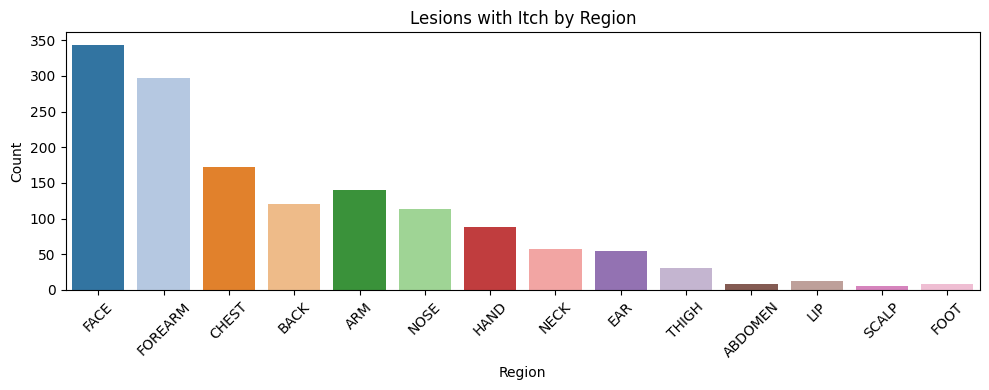

<ipython-input-172-b68343f9bdc6>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-172-b68343f9bdc6>:9: UserWarning:

The palette list has more values (20) than needed (14), which may not be intended.



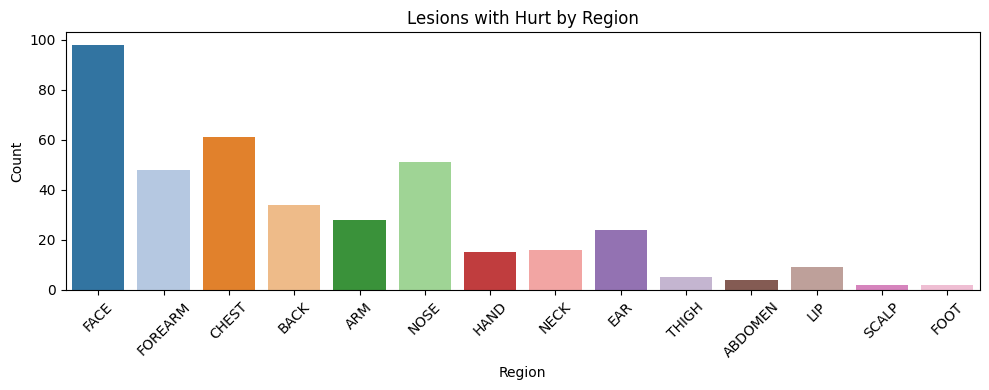

<ipython-input-172-b68343f9bdc6>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-172-b68343f9bdc6>:9: UserWarning:

The palette list has more values (20) than needed (14), which may not be intended.



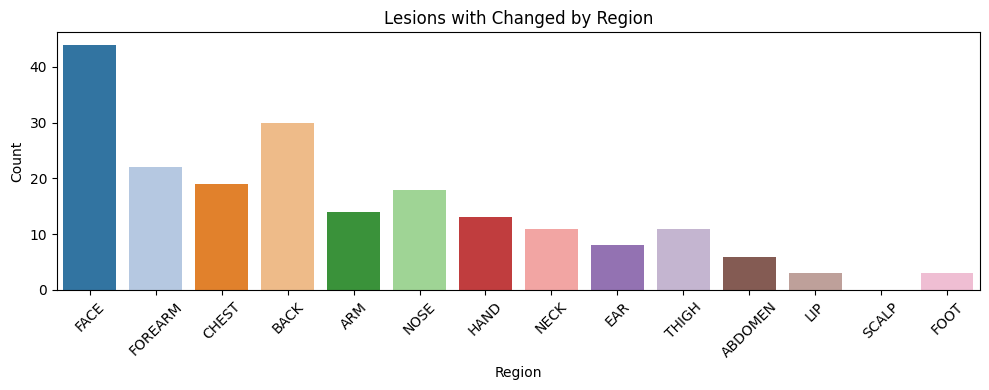

<ipython-input-172-b68343f9bdc6>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-172-b68343f9bdc6>:9: UserWarning:

The palette list has more values (20) than needed (14), which may not be intended.



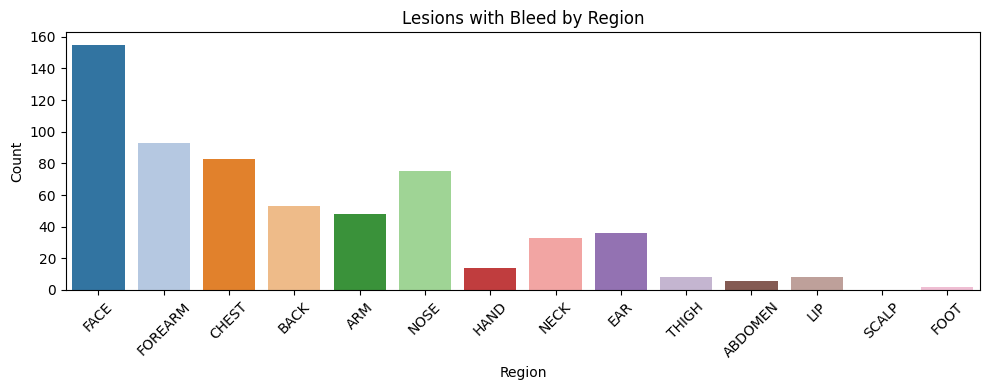

<ipython-input-172-b68343f9bdc6>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-172-b68343f9bdc6>:9: UserWarning:

The palette list has more values (20) than needed (14), which may not be intended.



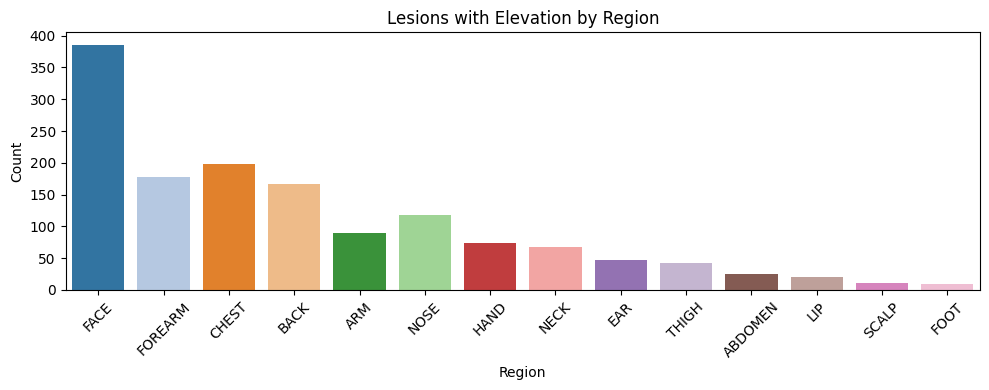

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['itch', 'hurt', 'changed', 'bleed', 'elevation']
palette = sns.color_palette("tab20")
for feature in features:
    plt.figure(figsize=(10, 4))

    sns.countplot(data=df[df[feature] == 1], x='region', order=df['region'].value_counts().index,palette=palette)
    plt.title(f"Lesions with {feature.capitalize()} by Region")
    plt.xlabel("Region")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<ipython-input-173-decd320fa078>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




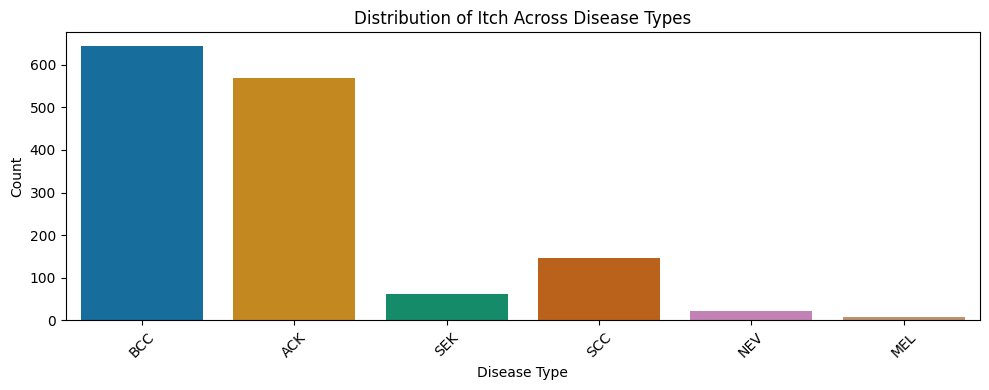

<ipython-input-173-decd320fa078>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




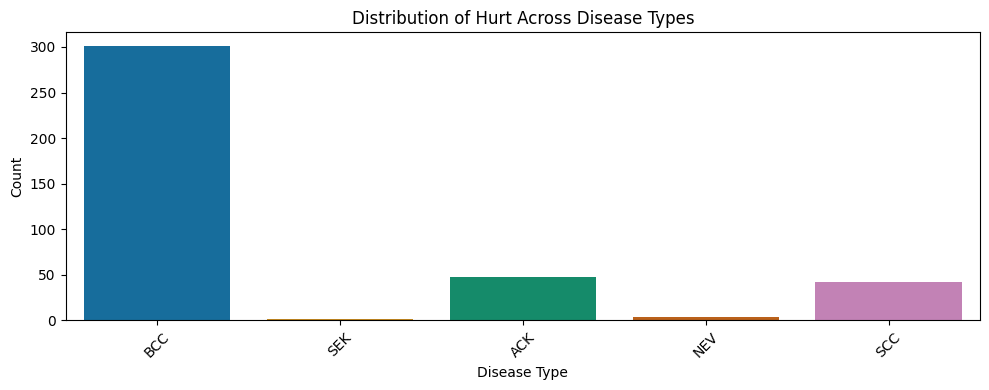

<ipython-input-173-decd320fa078>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




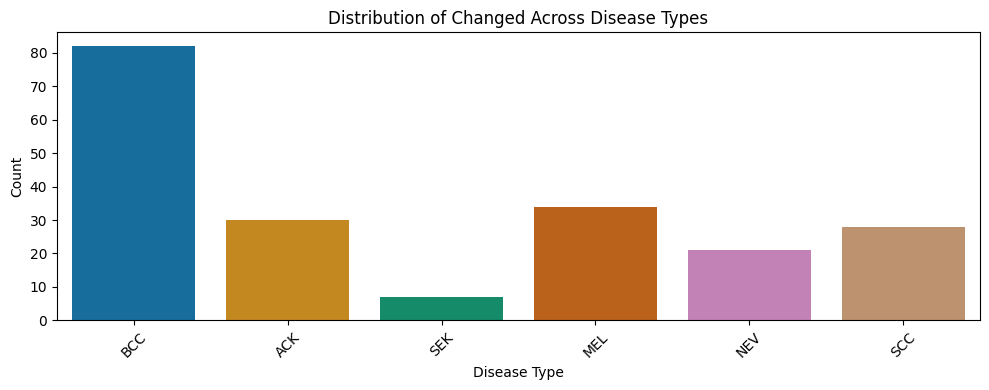

<ipython-input-173-decd320fa078>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




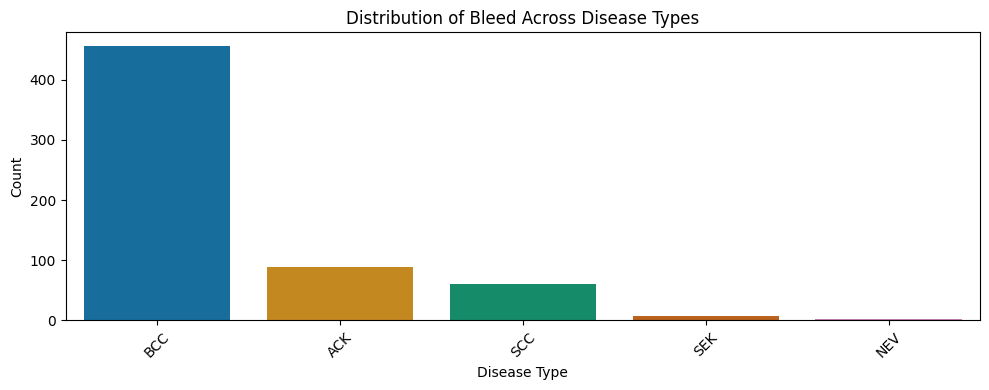

<ipython-input-173-decd320fa078>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




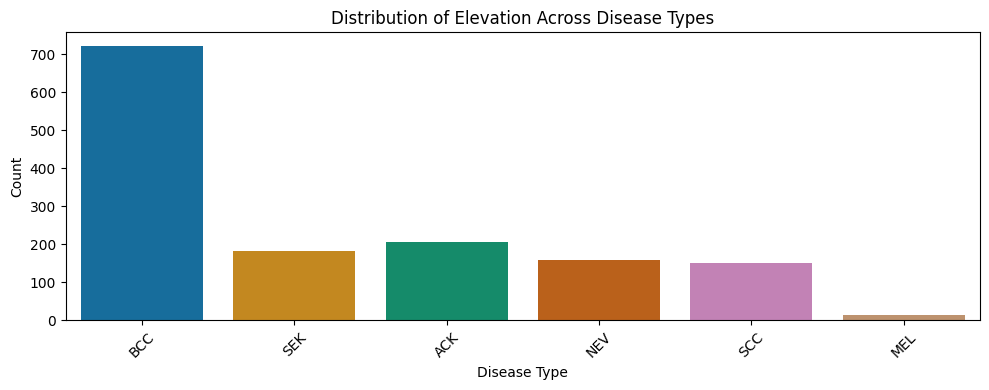

In [ ]:
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df[df[feature] == 1], x='diagnostic',palette='colorblind')
    plt.title(f"Distribution of {feature.capitalize()} Across Disease Types")
    plt.xlabel("Disease Type")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


label encoding for categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

# For gender
label_enc_cols = ['gender']
le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
df['gender'].unique()

array([2, 0, 1])

In [ ]:
le.classes_


array(['FEMALE', 'MALE', 'Unknown'], dtype=object)

In [ ]:
# df_original = pd.read_csv('/content/drive/MyDrive/skin disease detection fusion model/metadata.csv')

# # Now you can merge or replace the 'diagnostic' column back
# df['diagnostic'] = df_original['diagnostic']

In [ ]:
# Encode 'diagnostic' and display the mapping
le_diagnostic = LabelEncoder()
df['diagnostic'] = le_diagnostic.fit_transform(df['diagnostic'])

# Show class mapping
for index, class_label in enumerate(le_diagnostic.classes_):
    print(f"{class_label} → {index}")

ACK → 0
BCC → 1
MEL → 2
NEV → 3
SCC → 4
SEK → 5


In [ ]:
df.head()

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,0,0,Unknown,Unknown,8,0,2,0,...,8.0,3,0,0,0,0,0,0,PAT_1516_1765_530.png,0
1,PAT_46,881,0,0,POMERANIA,POMERANIA,55,0,0,1,...,5.0,1,1,1,0,1,1,1,PAT_46_881_939.png,1
2,PAT_1545,1867,0,0,Unknown,Unknown,77,0,2,0,...,8.0,0,1,0,0,0,0,0,PAT_1545_1867_547.png,0
3,PAT_1989,4061,0,0,Unknown,Unknown,75,0,2,0,...,8.0,0,1,0,0,0,0,0,PAT_1989_4061_934.png,0
4,PAT_684,1302,0,1,POMERANIA,POMERANIA,79,0,1,1,...,5.0,1,1,1,0,0,1,1,PAT_684_1302_588.png,1


In [ ]:
df['hurt'].unique()

array([0, 1])

one-hot encoding for columns with multiple values.

In [ ]:
# One-hot encode selected columns, drop first to avoid multicollinearity
df = pd.get_dummies(df, columns=['region', 'background_father', 'background_mother'], drop_first=True)


In [ ]:
# Show one-hot columns for 'region'
print([col for col in df.columns if col.startswith('region_')])

# Show one-hot columns for 'background_father'
print([col for col in df.columns if col.startswith('background_father_')])

# Show one-hot columns for 'background_mother'
print([col for col in df.columns if col.startswith('background_mother_')])


['region_ARM', 'region_BACK', 'region_CHEST', 'region_EAR', 'region_FACE', 'region_FOOT', 'region_FOREARM', 'region_HAND', 'region_LIP', 'region_NECK', 'region_NOSE', 'region_SCALP', 'region_THIGH']
['background_father_BRASIL', 'background_father_BRAZIL', 'background_father_CZECH', 'background_father_GERMANY', 'background_father_ISRAEL', 'background_father_ITALY', 'background_father_NETHERLANDS', 'background_father_POLAND', 'background_father_POMERANIA', 'background_father_PORTUGAL', 'background_father_SPAIN', 'background_father_UNK', 'background_father_Unknown']
['background_mother_FRANCE', 'background_mother_GERMANY', 'background_mother_ITALY', 'background_mother_NETHERLANDS', 'background_mother_NORWAY', 'background_mother_POLAND', 'background_mother_POMERANIA', 'background_mother_PORTUGAL', 'background_mother_SPAIN', 'background_mother_UNK', 'background_mother_Unknown']


In [ ]:
df.columns.tolist()


['patient_id',
 'lesion_id',
 'smoke',
 'drink',
 'age',
 'pesticide',
 'gender',
 'skin_cancer_history',
 'cancer_history',
 'has_piped_water',
 'has_sewage_system',
 'fitspatrick',
 'diameter_1',
 'diameter_2',
 'diagnostic',
 'itch',
 'grew',
 'hurt',
 'changed',
 'bleed',
 'elevation',
 'img_id',
 'biopsed',
 'region_ARM',
 'region_BACK',
 'region_CHEST',
 'region_EAR',
 'region_FACE',
 'region_FOOT',
 'region_FOREARM',
 'region_HAND',
 'region_LIP',
 'region_NECK',
 'region_NOSE',
 'region_SCALP',
 'region_THIGH',
 'background_father_BRASIL',
 'background_father_BRAZIL',
 'background_father_CZECH',
 'background_father_GERMANY',
 'background_father_ISRAEL',
 'background_father_ITALY',
 'background_father_NETHERLANDS',
 'background_father_POLAND',
 'background_father_POMERANIA',
 'background_father_PORTUGAL',
 'background_father_SPAIN',
 'background_father_UNK',
 'background_father_Unknown',
 'background_mother_FRANCE',
 'background_mother_GERMANY',
 'background_mother_ITALY',
 'bac

In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
num_cols = ['age', 'fitspatrick', 'diameter_1', 'diameter_2']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df[num_cols] = scaler.fit_transform(df[num_cols])

# Optional: Save scaler for later use (e.g., during inference)
import joblib
joblib.dump(scaler, 'scaler_metadata.pkl')


['scaler_metadata.pkl']

In [ ]:
print(df[num_cols].describe())


                age   fitspatrick    diameter_1    diameter_2
count  2.298000e+03  2.298000e+03  2.298000e+03  2.298000e+03
mean  -2.133483e-16  2.581824e-16 -1.515082e-16 -2.226244e-16
std    1.000218e+00  1.000218e+00  1.000218e+00  1.000218e+00
min   -3.427308e+00 -1.950906e+00 -1.600582e+00 -1.823786e+00
25%   -5.326622e-01 -2.873876e-01 -3.182165e-01 -5.445417e-01
50%    9.660869e-02 -2.873876e-01 -1.757315e-01 -1.181269e-01
75%    7.258796e-01 -2.873876e-01  1.092385e-01  9.508048e-02
max    2.110276e+00  6.366684e+00  1.264792e+01  1.310073e+01


In [ ]:
df.drop(['patient_id','lesion_id'],inplace=True,axis=1)

In [ ]:
df.head()

,smoke,drink,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,...,background_mother_GERMANY,background_mother_ITALY,background_mother_NETHERLANDS,background_mother_NORWAY,background_mother_POLAND,background_mother_POMERANIA,background_mother_PORTUGAL,background_mother_SPAIN,background_mother_UNK,background_mother_Unknown
0,0,0,-3.301454,0,2,0,0,0,0,-0.287388,...,False,False,False,False,False,False,False,False,False,True
1,0,0,-0.343881,0,0,1,1,1,1,1.376130,...,False,False,False,False,False,True,False,False,False,False
2,0,0,1.040515,0,2,0,0,0,0,-0.287388,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0.914661,0,2,0,0,0,0,-0.287388,...,False,False,False,False,False,False,False,False,False,True
4,0,1,1.166369,0,1,1,0,0,0,-1.950906,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
df.to_csv('cleaned_metadata.csv')

<ipython-input-189-a004523bf364>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




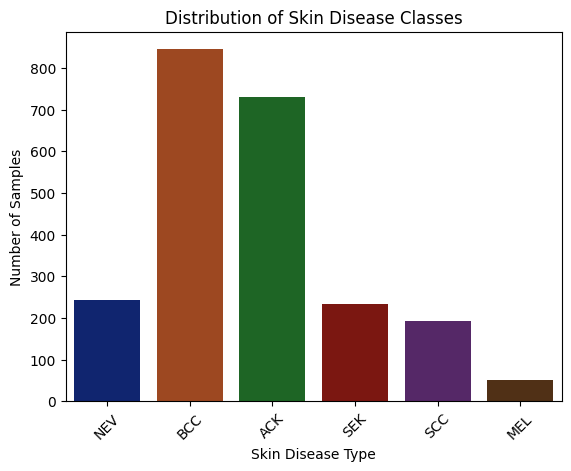

In [ ]:

# Define a dictionary to map numeric labels to string names
label_map = {
    0: 'ACK',
    1: 'BCC',
    2: 'MEL',
    3: 'NEV',
    4: 'SCC',
    5: 'SEK'
}

# Apply the mapping
df['label_name'] = df['diagnostic'].map(label_map)

# Now plot using the readable label
sns.countplot(data=df, x='label_name',palette='dark')
plt.title("Distribution of Skin Disease Classes")
plt.xlabel("Skin Disease Type")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='label_name', ylabel='count'>

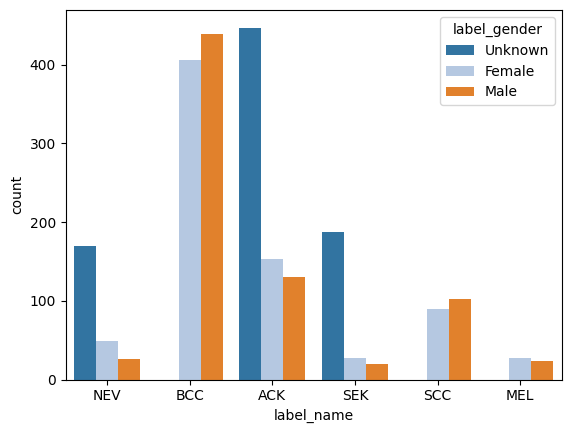

In [ ]:
label_gender = {
    0: 'Female',
    1: 'Male',
    2:'Unknown'
}

# Apply the mapping
df['label_gender'] = df['gender'].map(label_gender)

sns.countplot(data=df, x='label_name', hue='label_gender',palette='tab20')


In [ ]:
# Get mean and std directly from the scaler
age_mean = scaler.mean_[0]           # first feature is 'age'
age_std = scaler.scale_[0]

# Reverse age manually
df['age_original'] = df['age'] * age_std + age_mean


<ipython-input-201-66c405b4a8e4>:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



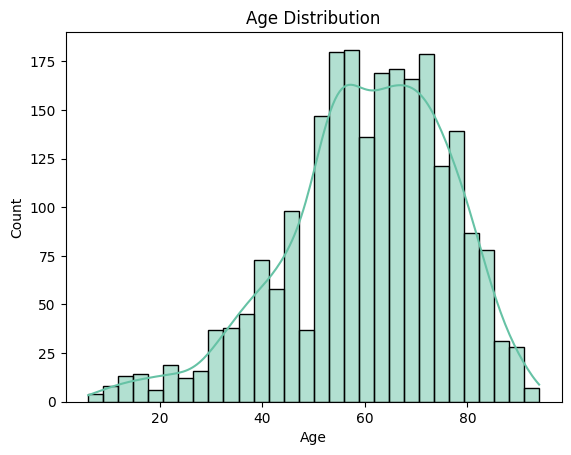

In [ ]:
sns.set_palette("Set2")
sns.histplot(data=df, x='age_original', kde=True,palette ='tab20')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


<ipython-input-202-55717903becd>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




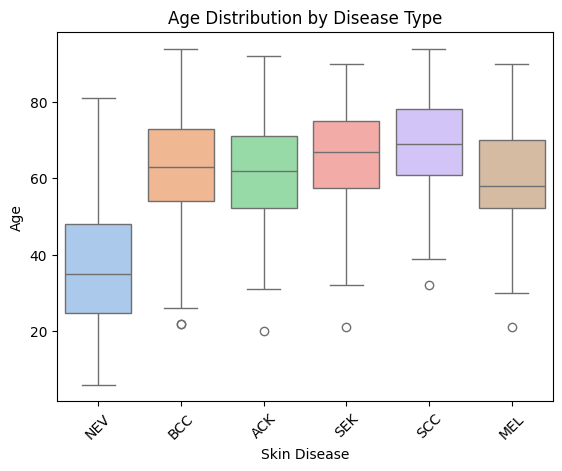

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load scaler and inverse transform to get original age
scaler = joblib.load('/content/drive/MyDrive/skin disease detection fusion model/scaler_metadata.pkl')
df_plot = df.copy()
df_plot[['age', 'fitspatrick', 'diameter_1', 'diameter_2']] = scaler.inverse_transform(df_plot[['age', 'fitspatrick', 'diameter_1', 'diameter_2']])

# Now plot original age vs disease type
sns.boxplot(data=df_plot, x='label_name', y='age',palette='pastel')
plt.title("Age Distribution by Disease Type")
plt.xlabel("Skin Disease")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()


<ipython-input-204-fc8ac1a5e25e>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




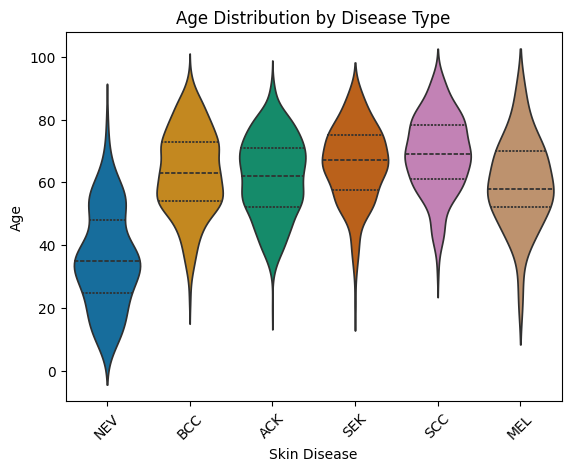

In [ ]:
sns.violinplot(data=df_plot, x='label_name', y='age', inner='quartile',palette = 'colorblind')
plt.title("Age Distribution by Disease Type")
plt.xlabel("Skin Disease")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()
